In [2]:
import cv2
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt
# set tesseract cmd path to tesseract ocr execute file path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

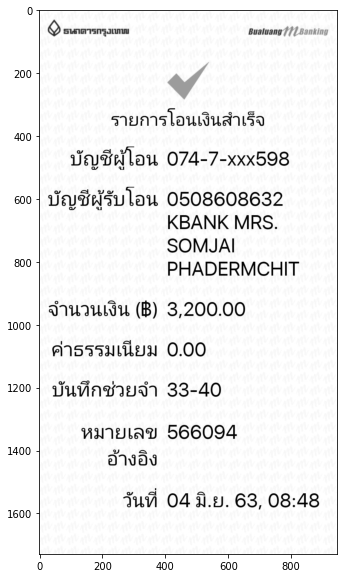

In [3]:
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

In [4]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 6')

In [5]:
print(recog_str)

@ ธนชาเตารทรุงเทพเข                                      8แลเพลทย    4     1
รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7->๐๐๕๐98
บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMUAI
PHADERMCHIT
จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง
วันที่ 04 มิ.ย. 63, 08:48



In [6]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 3')

In [6]:
print(recog_str)

(ธนาตารกรุงเทพย        ๒แลเแลทย7 778ลก

รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7-๓๐๐598

บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMIAI
PHADERMCHIT

จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง

วันที่ 04 มิ.ย. 63, 08:48



In [7]:
image = cv2.imread("images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
recog_str = image_to_string(image, lang='eng', config='--psm 3')
print(recog_str)

246—0—xxx909
0508608632 KBANK



In [9]:
from pytesseract import Output
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
print(image.shape)
image2 = image.copy()
for i in range(n_boxes-1):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    subimg = image2[y-2:y+h+2, x-2:x+w+2]
    if h<image2.shape[0]/20:
        sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
        print(sub_str)


(1729, 947)
อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาหารทรวเทาชพ

Bualuang } / LBan

รายการใโอนเงินสําเร็จ

รายการใโอนเงินสําเร็จ

บัญชีผ้โอน 074-7-%๕๕598

บัญชีผู้โอน

0 74—/—xxx598

บัญชีผู้รับโอน 0508608632

บัญชีผู้รับโอน

0508608632

KBANK MRS.

KBANK

MRS.

ร0เปป/ป

ร0เปป/ป

PHADERMCHIT

PHADERMCHIT

จํานวนเงิน (8) 3,200.00

จํ้านวนเงิน

(8)

3,200.00

ค่าธรรมเนียม 0.00

ค่าธรรมเนียม

0.00

บันทึกชวยจํา 33-40

บันทึกชวยจํา

33-40

หมายเลข 566094

หมายเลข

566094

อางอง

อางอง

วันที่ 04 มิ.ย. 63, 08:48

วันที่ 04 มิ.ย. 63, 08:48

วันที่ 04 มิ.ย. 63, 08:48

วันทิ

04.

ง.ย.

63,

08:48



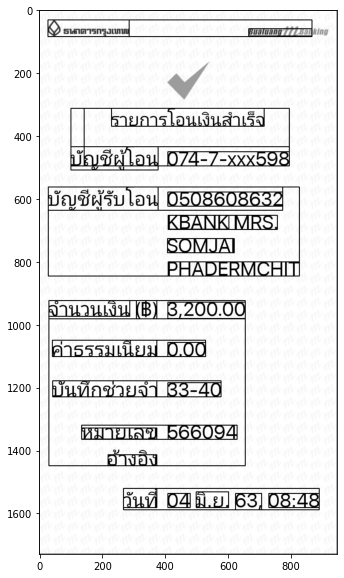

In [10]:

plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

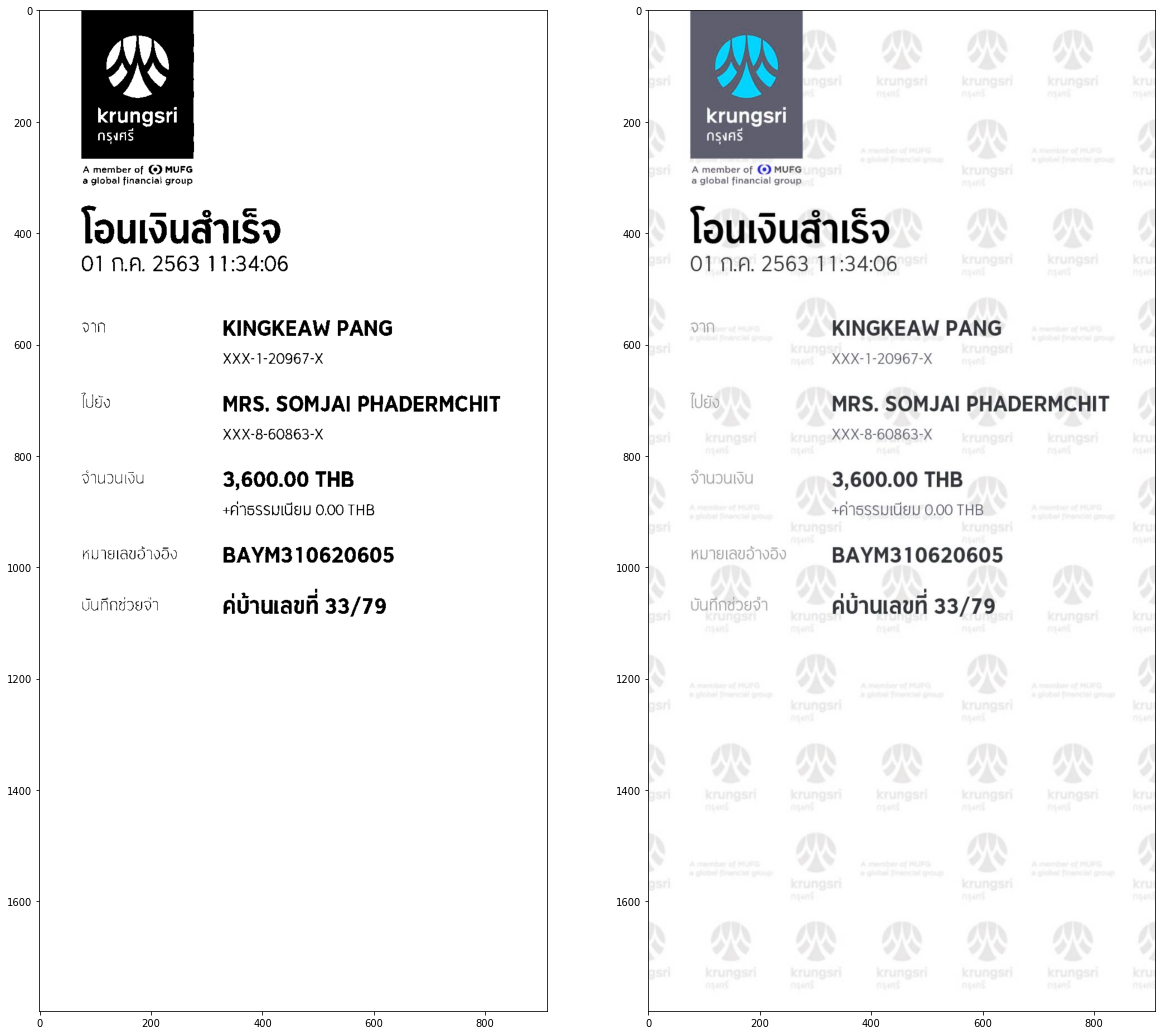

In [14]:
import easyocr
import cv2
image = cv2.imread('images/slips/79.jpg')
image2 = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
a, threshold = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(threshold,cmap='gray')
plt.subplot(122)
plt.imshow(image2)

In [25]:
reader = easyocr.Reader(['th','en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(threshold, width_ths=0.7)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[97, 165], [256, 165], [256, 217], [97, 217]], ' krungsri', 0.4725072383880615), ([[99, 207], [178, 207], [178, 247], [99, 247]], 'กรุงศรี', 0.0729917585849762), ([[78, 274], [278, 274], [278, 298], [78, 298]], 'a member of (mufc', 0.04992194473743439), ([[90, 294], [280, 294], [280, 318], [90, 318]], ' global financial group', 0.1775374859571457), ([[66, 344], [447, 344], [447, 435], [66, 435]], 'โอนเงินสำเร็จ', 0.1686629205942154), ([[71, 433], [453, 433], [453, 477], [71, 477]], '01 ก.ค. 2563 11:34:06', 0.11231563240289688), ([[325, 549], [639, 549], [639, 591], [325, 591]], ' kingkeaw pang', 0.135578915476799), ([[74, 556], [120, 556], [120, 582], [74, 582]], 'จาก', 0.3779962658882141), ([[328, 612], [514, 612], [514, 642], [328, 642]], 'xxx-1-20967 x', 0.44855836033821106), ([[69, 682], [136, 682], [136, 723], [69, 723]], 'ไปยัง', 0.5391420125961304), ([[327, 684], [832, 684], [832, 728], [327, 728]], 'mrs. somsa/ phapermchit', 0.08153004199266434), ([[326, 746], [514, 746], [5

19
 krungsri
กรุงศรี
a member of (mufc
 global financial group
โอนเงินสำเร็จ
01 ก.ค. 2563 11:34:06
 kingkeaw pang
จาก
xxx-1-20967 x
ไปยัง
mrs. somsa/ phapermchit
xxx-8-60863-x
3,600.00 thb
จำนวนเงิน
+ค่าธรรมเนียม o.oo thb
baym310620605
หมายเลขอ้างอิง
ค่บ้านเลขที่ 33/79
บันทึกช่วยจ่า


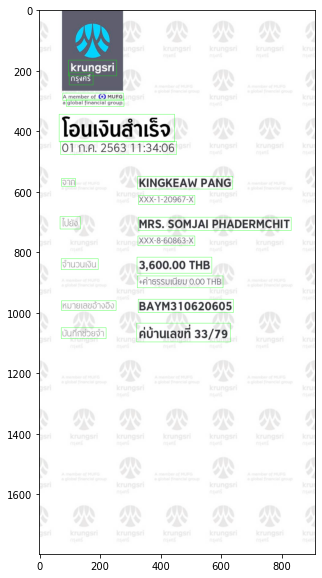

In [26]:
print(len(result))
image3 = image2.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for entry in result:
    top_left, top_right, bottom_right, bottom_left = entry[0]
    cv2.rectangle(image3, (top_left[0], top_left[1]), (bottom_right[0], bottom_right[1]), (0, 255, 0), 1)
    
    print(entry[1])
#     sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
#     print(sub_str)
#     cv2.putText(image2, entry[1], (top_left[0], top_left[1]), font, 1, (0, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(image3)

In [27]:
# find candidate by coordinate
def find_candidate(result, entry):
    top_left, top_right, bottom_right, bottom_left = entry[0]
    height = bottom_left[1] - top_left[1]
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if entry == entry1:
            continue
        if (top_left1[1] - bottom_left[1] < 1.5 * height and top_left1[1] - top_left[1] > 0) \
            or (abs(top_left1[1] - top_left[1]) < height/5 and abs(bottom_left1[1] - bottom_left[1]) < height/5):
            return entry1[1]
    return ''

import re
amount = ''
fee = ''

for entry in result:
    e_text = entry[1]
    # find amount
    if 'จำนวน' in e_text:
        amount = find_candidate(result, entry)
    if 'ค่าธรรมเนียม' in e_text:
        fee = find_candidate(result, entry)
        fee = fee.replace('o', '0')
# find date
transaction_date = ''
match_string = '[0-9]{1,2}\s*.\..\.\s*(([0-9]{4})|([0-9]{2}))'
for entry in result:
    e_text = entry[1]
    try:
        transaction_date = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_date = ''
# find time
transaction_time = ''
match_string = '[0-9]{2}\s*\:\s*[0-9]{2}'
for entry in result:
    e_text = entry[1]
    try:
        transaction_time = re.search(match_string, e_text).group(0)
        break
    except AttributeError:
        transaction_time = ''
# find bank name
bank_name = ''
bank_name_list = [
    {
        'en_name': 'Siam Commercial Bank', 
        'th_name' : 'ธนาคารกรุงเทพ',
        'synonyms': ['scb']
    }, 
    {
        'en_name': 'Bangkok Bank',
        'th_name': 'ธนาคารกรุงเทพ',
        'synonyms': ['Bualuang iBanking', 'ธนาคารกรุงเทพ', 'Bangkok Bank']
    }, 
    {
        'en_name': 'Krung Thai Bank',
        'th_name': 'ธนาคารกรุงไทย',
        'synonyms': ['Krungthai', 'กรุงไทย']
    },
    {
        'en_name': 'Kasikorn Bank',
        'th_name': 'ธนาคารกสิกรไทย',
        'synonyms': ['ธ.กสิกรไทย']
    },
    {
        'en_name': 'Thanachart Bank',
        'th_name': 'ธนาคารธนชาต',
        'synonyms': ['Thanachart Bank', 'ธนาคารธนชาต']
    }
    
]
for entry in result:
    e_text = entry[1]
    if 'scb' in e_text:
        bank_name = 'scb'
        break
        
print(amount)
print(fee)
print(transaction_date)
print(transaction_time)

+ค่าธรรมเนียม o.oo thb
baym310620605
01 ก.ค. 2563
11:34
